In [25]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [26]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [27]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine

In [28]:
# create engine to hawaii.sqlite
database_path = "/Users/siyuanliang/BootCamp_University/sqlalchemy_challenge/sqlalchemy-challenge/hawaii.sqlite"
engine = create_engine("sqlite:///hawaii.sqlite")

In [29]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [30]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [31]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [32]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [33]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

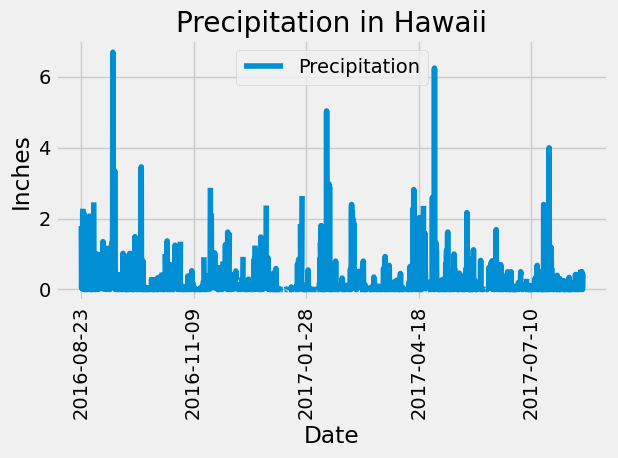

In [34]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
last_12_months = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()
# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date
last_12_months_df = pd.DataFrame(last_12_months)
last_12_months_df.set_index('date', inplace=True)
last_12_months_df.sort_values(by = 'date',ascending=True, inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
last_12_months_df.plot()
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation in Hawaii")
plt.legend(['Precipitation'])
plt.xticks(rotation =90)
plt.tight_layout()
plt.show()

In [35]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [36]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station.station).count()
total_stations

9

In [37]:
# List the stations and the counts in descending order.
each_station = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
each_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [38]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)

most_active_station = max(each_station, key=lambda each_station: each_station[1])

most_active_station


('USC00519281', 2772)

In [39]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
highest_temp
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
lowest_temp
average_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
average_temp

[(71.66378066378067,)]

In [40]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_months = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= year_ago).filter(Measurement.station == 'USC00519281').order_by(Measurement.date.desc()).all()
last_12_months_df = pd.DataFrame(last_12_months)



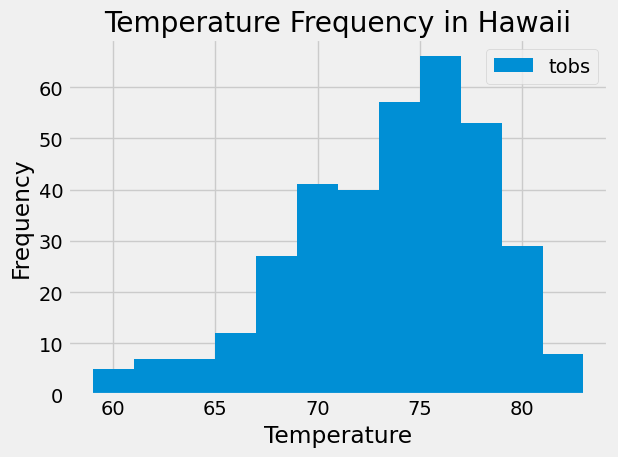

In [41]:
last_year_temp_df = pd.DataFrame(last_12_months, columns=['data','tobs'])
last_year_temp_df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Frequency in Hawaii")
plt.legend(['tobs'])
plt.tight_layout()
plt.show()

# Close session

In [42]:
# Close Session
session.close()